# Paso 1: Cargar y explorar los datos

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mlflow
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

In [123]:
# Configurar MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("toyota_project")

<Experiment: artifact_location='mlflow-artifacts:/833447958012810940', creation_time=1747431455974, experiment_id='833447958012810940', last_update_time=1747431455974, lifecycle_stage='active', name='toyota_project', tags={}>

In [3]:
# Cargar dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv",
    encoding="utf8",
    engine="python"
)
pd.set_option('display.max_columns', None)

df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [4]:
# Ver la forma (cantidad de filas y columnas)
df.shape

(1436, 37)

In [5]:
# Ver info general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
# Ver resumen estadístico de columnas numéricas
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Paso 2: Limpieza del dataset

In [7]:
df_limp = df.copy()

In [8]:
df_limp.columns.tolist()

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [9]:
# Ver la cantidad de valores nulos por columna
df_limp.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [10]:
# Filtrar filas con valores negativos en variables clave
df_limp[(df_limp["KM"] < 0) | (df_limp["Weight"] < 0) | (df_limp["Age_08_04"] < 0) | (df_limp["Price"] < 0)]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


# Paso 3: Análisis exploratorio de datos

In [11]:
df_eda = df_limp.copy()

In [12]:
# Ver columnas categóricas
categorical_cols = df_eda.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Model', 'Fuel_Type']

In [13]:
# Ver frecuencia de valores en cada variable categórica (ejemplo con primera variable)
df_eda[categorical_cols[0]].value_counts()

Model
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors      107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors       83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors         79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors        70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors        43
                                                        ... 
TOYOTA Corolla 1.6 16V HATCHBACK LINEA LUNA 2/3-Doors      1
TOYOTA Corolla 1.6 Linea Terra Comfort 2/3-Doors           1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                   1
?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors               1
TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors              1
Name: count, Length: 372, dtype: int64

In [14]:
df_eda[categorical_cols[1]].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

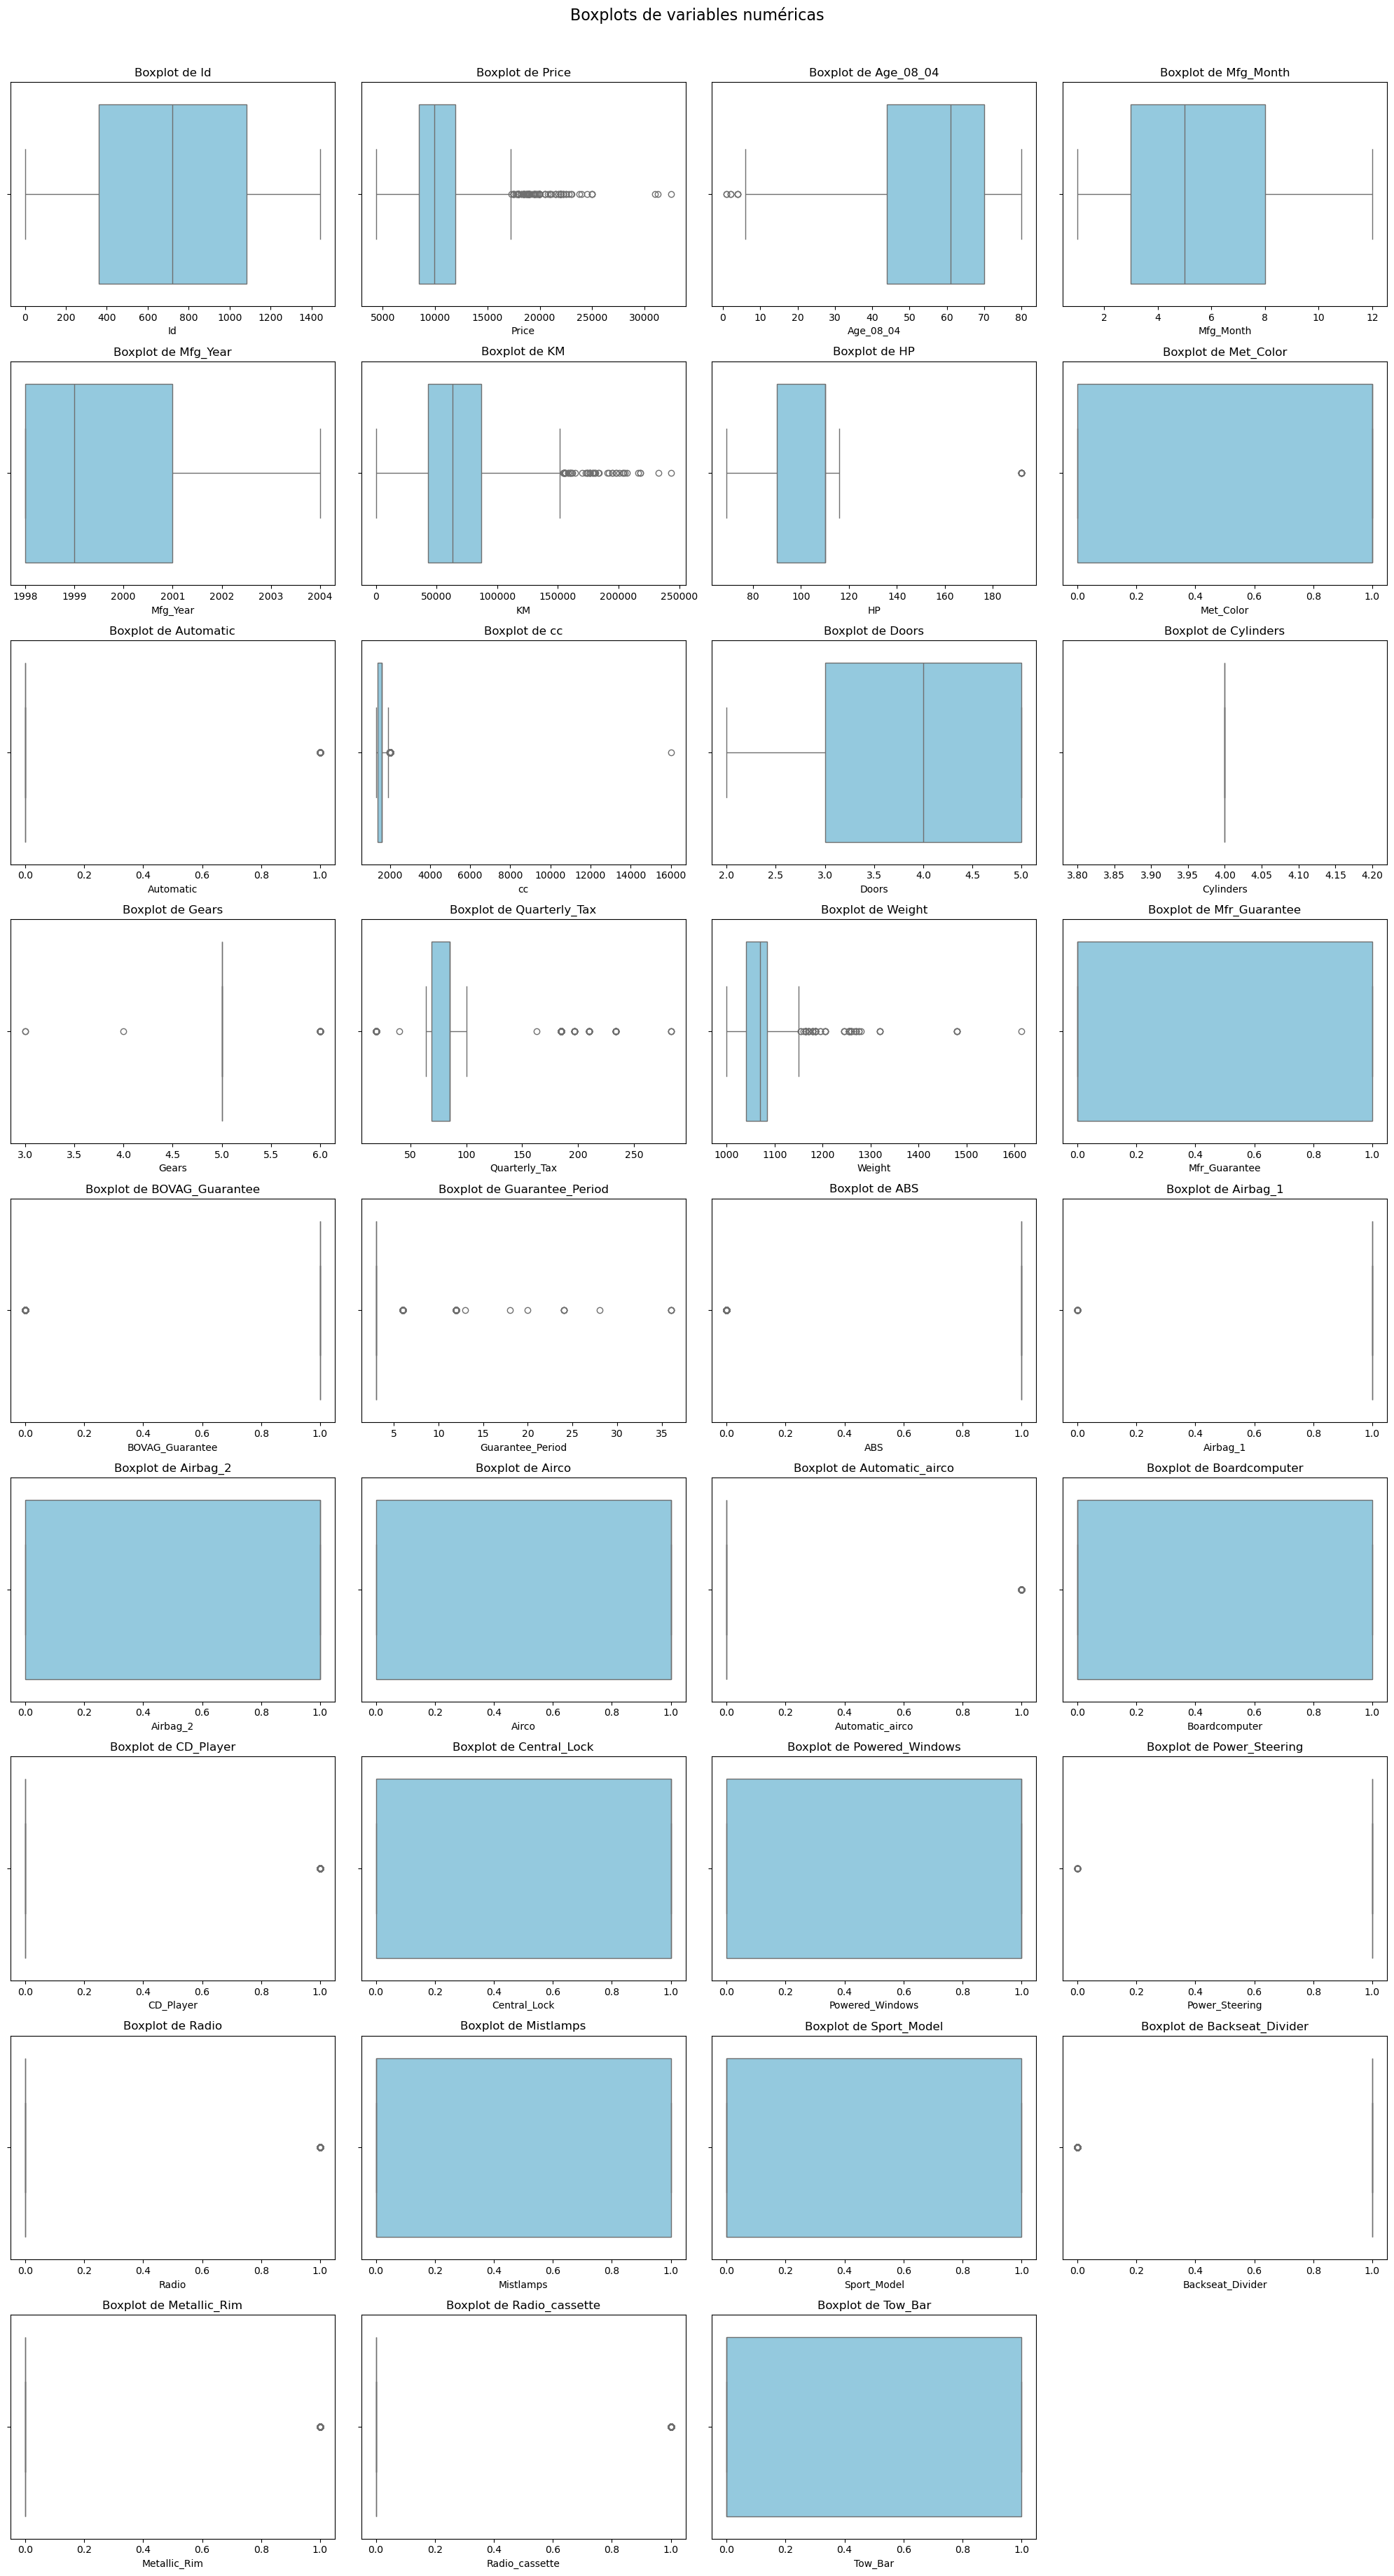

In [15]:
# Distribucion de variables numéricas
numeric_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar subplots
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_eda[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.suptitle("Boxplots de variables numéricas", fontsize=16, y=1.02)
plt.show()

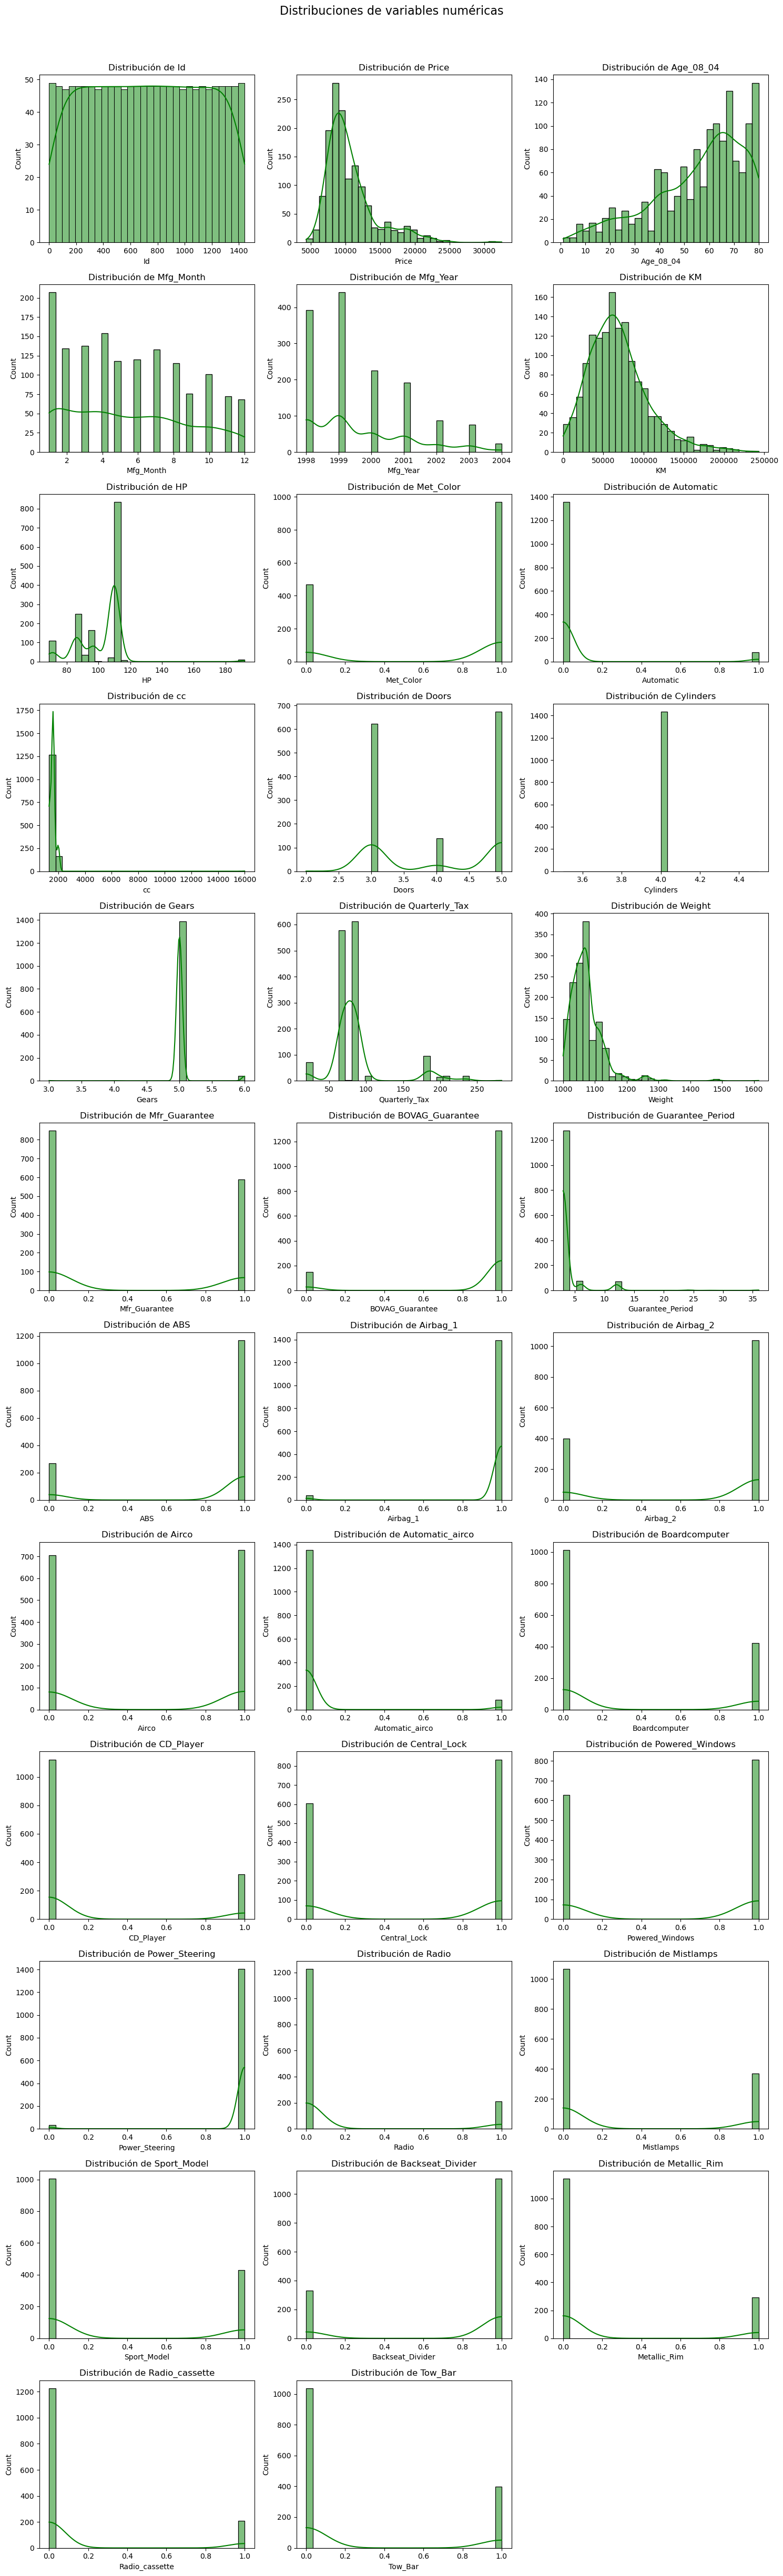

In [16]:
# Subplots para histogramas con KDE
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_eda[col], kde=True, bins=30, color='green')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.suptitle("Distribuciones de variables numéricas", fontsize=16, y=1.02)
plt.show()

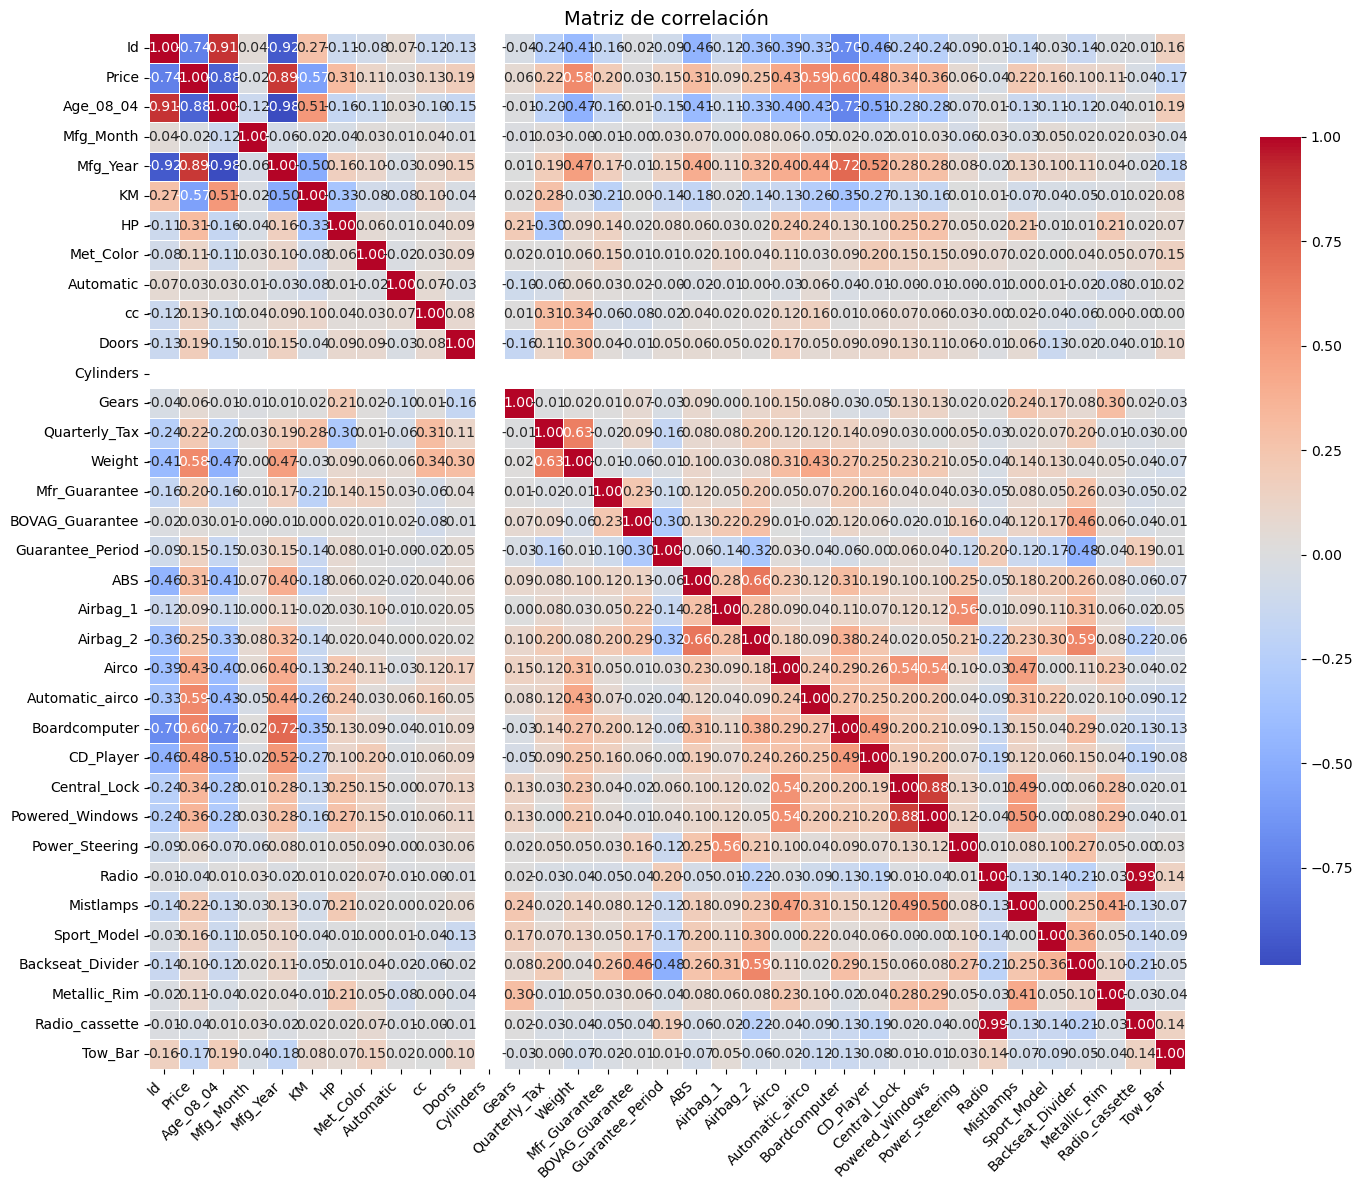

In [17]:
plt.figure(figsize=(16, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(
    df_eda.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},  # Tamaño de fuente de los números
    cbar_kws={"shrink": 0.8},  # Reduce el tamaño de la barra de color
    linewidths=0.5,  # Líneas entre celdas para más claridad
    square=True  # Hace que las celdas sean cuadradas
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matriz de correlación", fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
# Supongamos que la columna id se llama 'Id'
# Identificar filas duplicadas excepto por la columna 'Id'

duplicados = df.duplicated(subset=[col for col in df.columns if col != 'Id' and col != 'Model'], keep=False)

# Mostrar filas duplicadas
df_duplicados = df_eda[duplicados]

print(f"Cantidad de filas duplicadas (excepto Id y Model): {df_duplicados.shape[0]}")
print(df_duplicados)

Cantidad de filas duplicadas (excepto Id y Model): 2
      Id                                        Model  Price  Age_08_04  \
112  114  ?TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV  24950          8   
113  115   TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV  24950          8   

     Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  Automatic    cc  \
112          1      2004  13253    Diesel  116          1          0  2000   
113          1      2004  13253    Diesel  116          1          0  2000   

     Doors  Cylinders  Gears  Quarterly_Tax  Weight  Mfr_Guarantee  \
112      5          4      5            234    1320              0   
113      5          4      5            234    1320              0   

     BOVAG_Guarantee  Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  \
112                0                 3    1         1         1      1   
113                0                 3    1         1         1      1   

     Automatic_airco  Boardcomputer  CD_Player  Cent

In [19]:
# Elimino uno de los duplicados
df_eda = df_eda.drop_duplicates(subset=[col for col in df.columns if col != 'Id' and col != 'Model'], keep='first')

In [20]:
# Pasar a mayúsculas
df_eda['Model'] = df_eda['Model'].str.upper()

# Quitar signos de pregunta al inicio (si hay más de uno también)
df_eda['Model'] = df_eda['Model'].str.lstrip('?')

In [21]:
# Ver frecuencia de Models
df_eda[categorical_cols[0]].value_counts()

Model
TOYOTA COROLLA 1.6 16V HATCHB LINEA TERRA 2/3-DOORS    109
TOYOTA COROLLA 1.3 16V HATCHB LINEA TERRA 2/3-DOORS     84
TOYOTA COROLLA 1.6 16V LIFTB LINEA LUNA 4/5-DOORS       80
TOYOTA COROLLA 1.6 16V LIFTB LINEA TERRA 4/5-DOORS      71
TOYOTA COROLLA 1.4 16V VVT I HATCHB TERRA 2/3-DOORS     54
                                                      ... 
TOYOTA COROLLA 1.3 SDN LINEA TERRA AUT 4/5-DOORS         1
TOYOTA COROLLA 1.3 16V LINEA TERRA                       1
TOYOTA COROLLA 1.3 LINEA TERRA HATCHBACK 2/3-DOORS       1
TOYOTA COROLLA 1.6 LB AUT 4/5-DOORS                      1
TOYOTA COROLLA 1.6 WGN LINEA TERRA STATIONWAGEN          1
Name: count, Length: 312, dtype: int64

In [22]:
# Convierto columna categórica 'Fuel_Type' a dos numéricas. No booleanas
df_eda = pd.get_dummies(df_eda, columns=["Fuel_Type"], drop_first=True, dtype=int)
df_eda.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA COROLLA 2.0 D4D HATCHB TERRA 2/3-DOORS,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0
1,2,TOYOTA COROLLA 2.0 D4D HATCHB TERRA 2/3-DOORS,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0
2,3,TOYOTA COROLLA 2.0 D4D HATCHB TERRA 2/3-DOORS,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,TOYOTA COROLLA 2.0 D4D HATCHB TERRA 2/3-DOORS,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,5,TOYOTA COROLLA 2.0 D4D HATCHB SOL 2/3-DOORS,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0


In [23]:
# Calculo Age en base a columnas Mfg_Year y Mfg_Month
df_eda["Age_08_04_calculado"] = (2004 - df_eda["Mfg_Year"]) * 12 + (8 - df_eda["Mfg_Month"])

# Quito columnas Mfg_Year, Mfg_Month y Age_08_04
df_eda.drop(columns=["Mfg_Year", "Mfg_Month", "Age_08_04"], inplace=True)

# Quito columna Id innecesaria
df_eda.drop(columns=["Id"], inplace=True)

In [24]:
# Quito columna Cylinders ya que es constante en todo el dataset
df_eda.drop(columns=["Cylinders"], inplace=True)

In [25]:
# Combino columnas Airbag por cantidad de airbags en el auto
df_eda['Tiene_Airbag'] = ((df_eda['Airbag_1'] == 1) | (df_eda['Airbag_2'] == 1)).astype(int)
df_eda.drop(['Airbag_1', 'Airbag_2'], axis=1, inplace=True)

In [26]:
# Central_lock y Powered_window son colineales por lo que se puede eliminar una
df_eda.drop(['Central_Lock'], axis=1, inplace=True)

In [27]:
# Radio y Radio_cassette son colineales por lo que se puede eliminar una
df_eda.drop(['Radio_cassette'], axis=1, inplace=True)

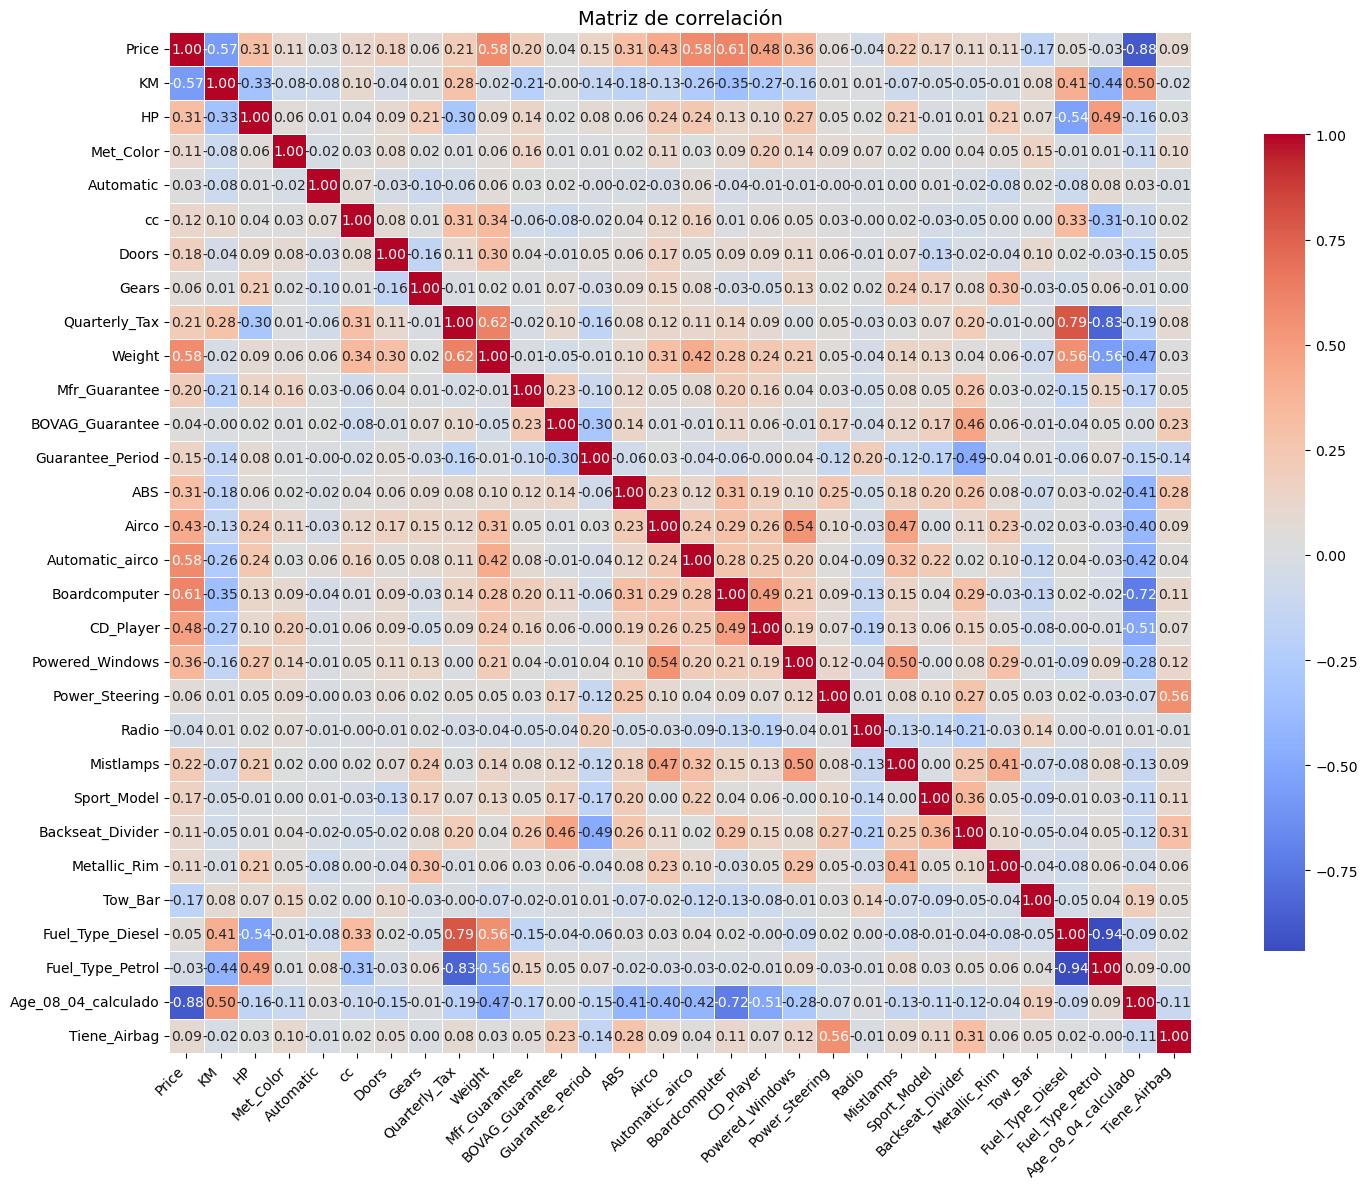

In [28]:
plt.figure(figsize=(16, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(
    df_eda.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},  # Tamaño de fuente de los números
    cbar_kws={"shrink": 0.8},  # Reduce el tamaño de la barra de color
    linewidths=0.5,  # Líneas entre celdas para más claridad
    square=True  # Hace que las celdas sean cuadradas
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matriz de correlación", fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
# Analizamos la variable 'Weight' (peso) para ver si los que tienen alta correlación con la misma permiten predecirla

from sklearn.linear_model import LinearRegression

# Lista de variables predictoras
features = ['cc', 'Doors', 'Airco', 'Automatic_airco', 
            'Boardcomputer', 'CD_Player', 'Fuel_Type_Diesel']

# Separar X (predictoras) e y (target)
X = df_eda[features]
y = df_eda['Weight']

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model.coef_
})
print(coef_df)

# R² (qué tan bien explican esas variables el peso)
print(f"R² Score: {model.score(X, y):.4f}")

            Feature  Coeficiente
0                cc     0.009852
1             Doors    12.680982
2             Airco    13.427771
3   Automatic_airco    69.062038
4     Boardcomputer    10.490340
5         CD_Player     8.317123
6  Fuel_Type_Diesel    86.764487
R² Score: 0.5964


Como vemos se tiene un R2 de 0.59, lo que indica que las variables seleccionadas del modelo explica el 59% de la variabilidad del peso. Se considera que el peso es una consecuencia de dichas features y no la causa por lo que se decide eliminar el peso de las features para la predicción del precio.

In [30]:
# Elimino la variable Weight
df_eda.drop(columns=["Weight"], inplace=True)

In [31]:
# Analizamos la variable 'Quarterly_Tax' para ver si los que tienen alta correlación con la misma permiten predecirla

from sklearn.linear_model import LinearRegression

# Lista de variables predictoras
features = ['cc', 'Fuel_Type_Diesel']

# Separar X (predictoras) e y (target)
X = df_eda[features]
y = df_eda['Quarterly_Tax']

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model.coef_
})
print(coef_df)

# R² (qué tan bien explican esas variables el peso)
print(f"R² Score: {model.score(X, y):.4f}")

            Feature  Coeficiente
0                cc     0.005119
1  Fuel_Type_Diesel   102.395704
R² Score: 0.6288


Se tiene un R2 de 0.62 por lo que se considera que cc y Fuel_Type_Diesel y Petrol tienen alta colinealidad. Se decide eliminar la variable Quarterly_Tax para evitar el sobreajuste del modelo.

In [32]:
# Elimino la variable Weight
df_eda.drop(columns=["Quarterly_Tax"], inplace=True)

Las features CD_Player y Boardcomputer tienen una alta colinealidad por lo que se decide eliminar CD_Player para evitar el sobreajuste del modelo.

In [33]:
# Elimino la variable Weight
df_eda.drop(columns=["CD_Player"], inplace=True)

In [34]:
# Elimino la variable Sport_Model ya que es una feature derivada
df_eda.drop(columns=["Sport_Model"], inplace=True)

In [35]:
# Elimino la variable Fuel_Type_Petrol
df_eda.drop(columns=["Fuel_Type_Petrol"], inplace=True)

En base a las features restantes utilizamos la matriz de correlación para ver cuales tienen una alta correlación con el precio. Se decide eliminar las variables que tienen una correlación menor a < 0.12

In [36]:
cols_to_drop = [
    "Automatic",
    "Met_Color",
    "Gears",
    "BOVAG_Guarantee",
    "Power_Steering",
    "Radio",
    "Backseat_Divider",
    "Tow_Bar",
    "Metallic_Rim",
    "Tiene_Airbag"
]

df_eda = df_eda.drop(columns=cols_to_drop)

# Paso 4: Preprocesamiento

In [56]:
df_pp = df_eda.copy()

df_pp = df_pp.drop(columns=["Model"])

In [57]:
# Separar variables
X = df_pp.drop("Price", axis=1)
y = df_pp["Price"]

# Preprocesamiento
X = pd.get_dummies(X, drop_first=True)           # One-hot encoding
X = X.apply(pd.to_numeric, errors='coerce')      # Forzar datos a numérico
y = pd.to_numeric(y, errors='coerce')            # Lo mismo para el target

X.head()

,KM,HP,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,Powered_Windows,Mistlamps,Fuel_Type_Diesel,Age_08_04_calculado
0,46986,90,2000,3,0,3,1,0,0,1,1,0,1,22
1,72937,90,2000,3,0,3,1,1,0,1,0,0,1,22
2,41711,90,2000,3,1,3,1,0,0,1,0,0,1,23
3,48000,90,2000,3,1,3,1,0,0,1,0,0,1,25
4,38500,90,2000,3,1,3,1,1,0,1,1,1,1,29


In [58]:
# Combinar X e y para eliminar filas con NaNs
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop("Price", axis=1)
y = combined["Price"]

# Convertir a float y agregar constante para OLS
X = X.astype(float)
#y = y.astype(float)
X = sm.add_constant(X)

X.head()

,const,KM,HP,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,Powered_Windows,Mistlamps,Fuel_Type_Diesel,Age_08_04_calculado
0,1.0,46986.0,90.0,2000.0,3.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,22.0
1,1.0,72937.0,90.0,2000.0,3.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,22.0
2,1.0,41711.0,90.0,2000.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0
3,1.0,48000.0,90.0,2000.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0
4,1.0,38500.0,90.0,2000.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,29.0


In [59]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

In [61]:
def run_ols_with_mlflow(X_train, y_train, X_test, y_test, run_name="ols_model_run"):
    with mlflow.start_run(run_name=run_name):
        # Ajustar modelo
        model = sm.OLS(y_train, X_train)
        results = model.fit()

        print(results.summary())

        # Predicciones
        y_pred = results.predict(X_test)

        # Métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2_score", r2)

        # Métricas de statsmodels
        mlflow.log_metric("aic", results.aic)
        mlflow.log_metric("bic", results.bic)
        mlflow.log_metric("df_model", results.df_model)
        mlflow.log_metric("fvalue", results.fvalue)
        mlflow.log_metric("rsquared", results.rsquared)
        mlflow.log_metric("rsquared_adj", results.rsquared_adj)
        mlflow.log_metric("ssr", results.ssr)

        # Guardar artefactos
        os.makedirs("mlartifacts", exist_ok=True)

        summary_path = os.path.join("mlartifacts", "ols_summary.txt")
        with open(summary_path, "w") as f:
            f.write(results.summary().as_text())
        mlflow.log_artifact(summary_path)

        model_path = os.path.join("mlartifacts", "ols_model.pkl")
        joblib.dump(results, model_path)
        mlflow.log_artifact(model_path)

        features_path = os.path.join("mlartifacts", "features.txt")
        with open(features_path, "w") as f:
            f.write("\n".join(X_train.columns))
        mlflow.log_artifact(features_path)

    print("Modelo OLS registrado con MLflow.")

run_ols_with_mlflow(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     477.0
Date:              jue., 29 may. 2025   Prob (F-statistic):               0.00
Time:                        12:39:36   Log-Likelihood:                -7351.0
No. Observations:                 861   AIC:                         1.473e+04
Df Residuals:                     846   BIC:                         1.480e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.65e+04    

En base a los valores de P>|t| decido eliminar las variables que no son significativas como Airco y Mistlamps.

In [44]:
# Quito Fuel_Type_Diesel
X = X.drop(columns=["Fuel_Type_Diesel"])

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

run_ols_with_mlflow(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     459.3
Date:              jue., 29 may. 2025   Prob (F-statistic):               0.00
Time:                        12:29:09   Log-Likelihood:                -7394.0
No. Observations:                 861   AIC:                         1.482e+04
Df Residuals:                     847   BIC:                         1.488e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.402e+04    

In [46]:
# Quito
X = X.drop(columns=["KM"])

In [47]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

run_ols_with_mlflow(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     446.1
Date:              jue., 29 may. 2025   Prob (F-statistic):               0.00
Time:                        12:29:13   Log-Likelihood:                -7435.2
No. Observations:                 861   AIC:                         1.490e+04
Df Residuals:                     848   BIC:                         1.496e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.472e+04    

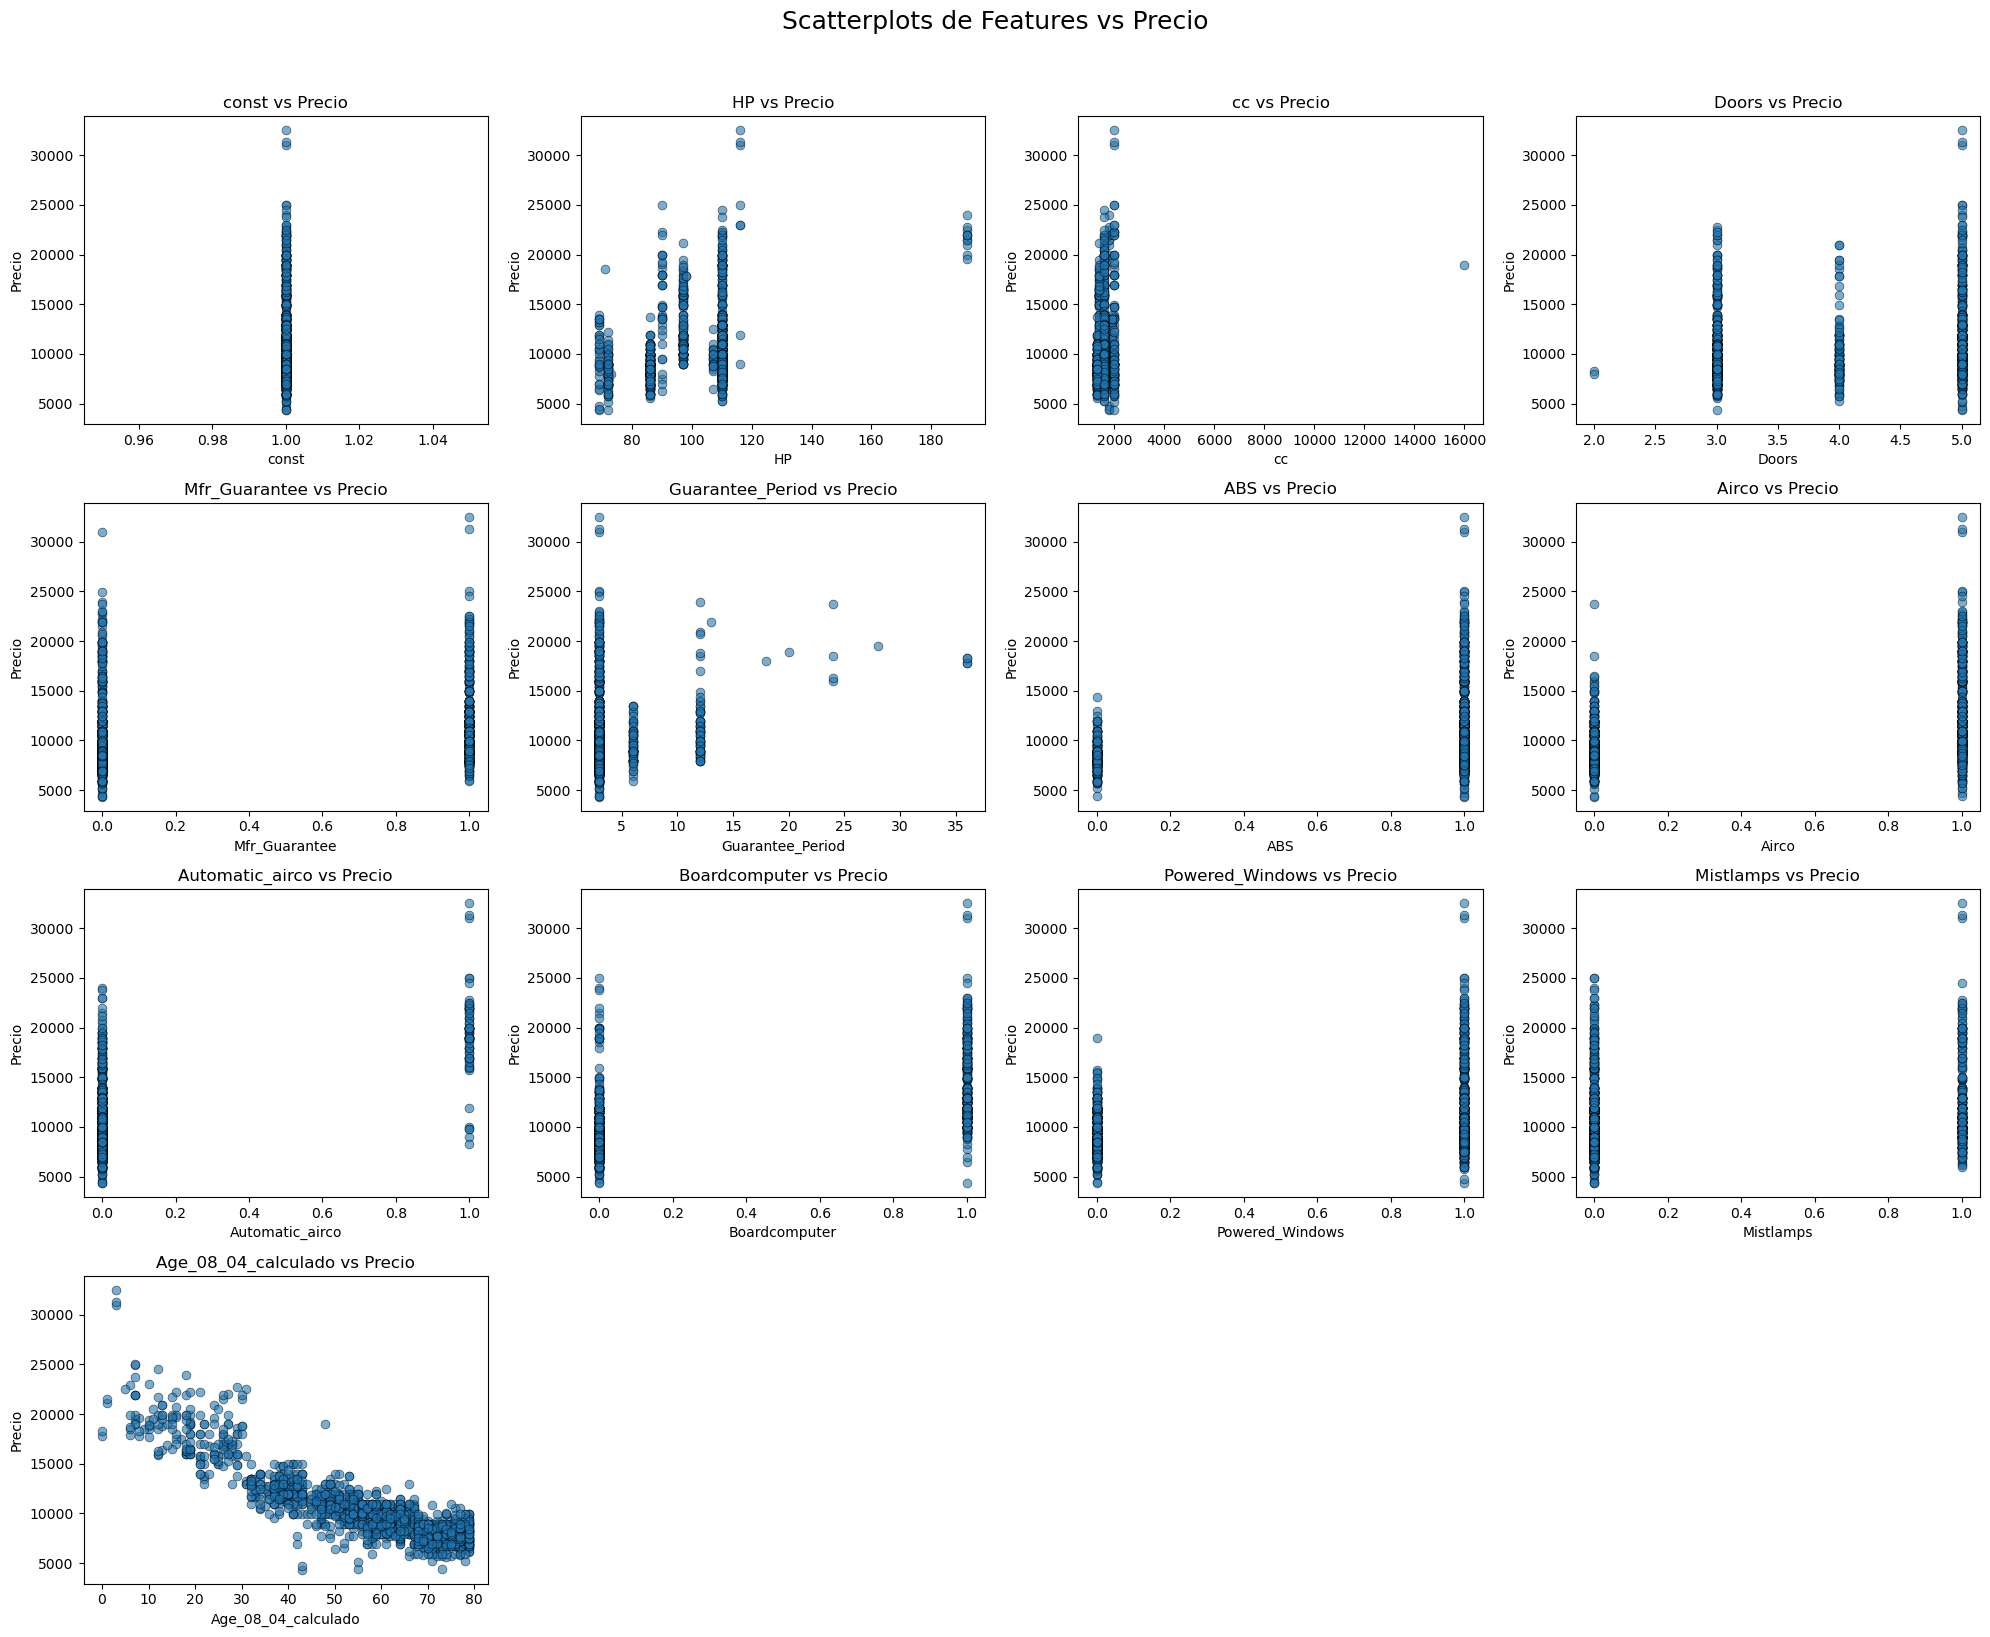

In [48]:
import math

# Calcular layout: 4 columnas, y tantas filas como necesites
n_cols = 4
n_features = len(X.columns)
n_rows = math.ceil(n_features / n_cols)

# Crear figura
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Iterar por cada columna y graficar
for i, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=X[column], y=y, alpha=0.6, edgecolor="k", s=40)
    plt.title(f'{column} vs Precio')
    plt.xlabel(column)
    plt.ylabel("Precio")
    plt.tight_layout()

# Espaciado entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Scatterplots de Features vs Precio', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Proceso nuevamente con limpieza de outliers

In [103]:
df_limpio = df_pp[
    (df_pp["Price"] > 1000) & (df_pp["Price"] < 25000) &
    (df_pp["Age_08_04_calculado"] > 6) & (df_pp["Age_08_04_calculado"] < 80) &
    (df_pp["cc"] > 600) & (df_pp["cc"] < 2200) &
    (df_pp["Guarantee_Period"] > 2) & (df_pp["Guarantee_Period"] < 12) &
    (df_pp["Doors"].isin([3, 4, 5])) &
    (df_pp["HP"] > 30) & (df_pp["HP"] < 118)
]

In [104]:
# Separar variables
X = df_limpio.drop("Price", axis=1)
y = df_limpio["Price"]

# Preprocesamiento
X = pd.get_dummies(X, drop_first=True)           # One-hot encoding
X = X.apply(pd.to_numeric, errors='coerce')      # Forzar datos a numérico
y = pd.to_numeric(y, errors='coerce')            # Lo mismo para el target

X.head()

,KM,HP,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,Powered_Windows,Mistlamps,Fuel_Type_Diesel,Age_08_04_calculado
0,46986,90,2000,3,0,3,1,0,0,1,1,0,1,22
1,72937,90,2000,3,0,3,1,1,0,1,0,0,1,22
2,41711,90,2000,3,1,3,1,0,0,1,0,0,1,23
3,48000,90,2000,3,1,3,1,0,0,1,0,0,1,25
4,38500,90,2000,3,1,3,1,1,0,1,1,1,1,29


In [105]:
# Combinar X e y para eliminar filas con NaNs
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop("Price", axis=1)
y = combined["Price"]

# Convertir a float y agregar constante para OLS
X = X.astype(float)
#y = y.astype(float)
X = sm.add_constant(X)

X.head()

,const,KM,HP,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,Powered_Windows,Mistlamps,Fuel_Type_Diesel,Age_08_04_calculado
0,1.0,46986.0,90.0,2000.0,3.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,22.0
1,1.0,72937.0,90.0,2000.0,3.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,22.0
2,1.0,41711.0,90.0,2000.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0
3,1.0,48000.0,90.0,2000.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0
4,1.0,38500.0,90.0,2000.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,29.0


In [106]:
cols_to_drop = ["KM", "Fuel_Type_Diesel", "Mistlamps"]
X = X.drop(columns=cols_to_drop)

In [107]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [108]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1063, 12)
y_train shape: (1063,)


In [109]:
run_ols_with_mlflow(X_train, y_train, X_test, y_test, run_name="ols_model_run_limpio")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     513.6
Date:              jue., 29 may. 2025   Prob (F-statistic):               0.00
Time:                        12:48:40   Log-Likelihood:                -9103.0
No. Observations:                1063   AIC:                         1.823e+04
Df Residuals:                    1051   BIC:                         1.829e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.52e+04    

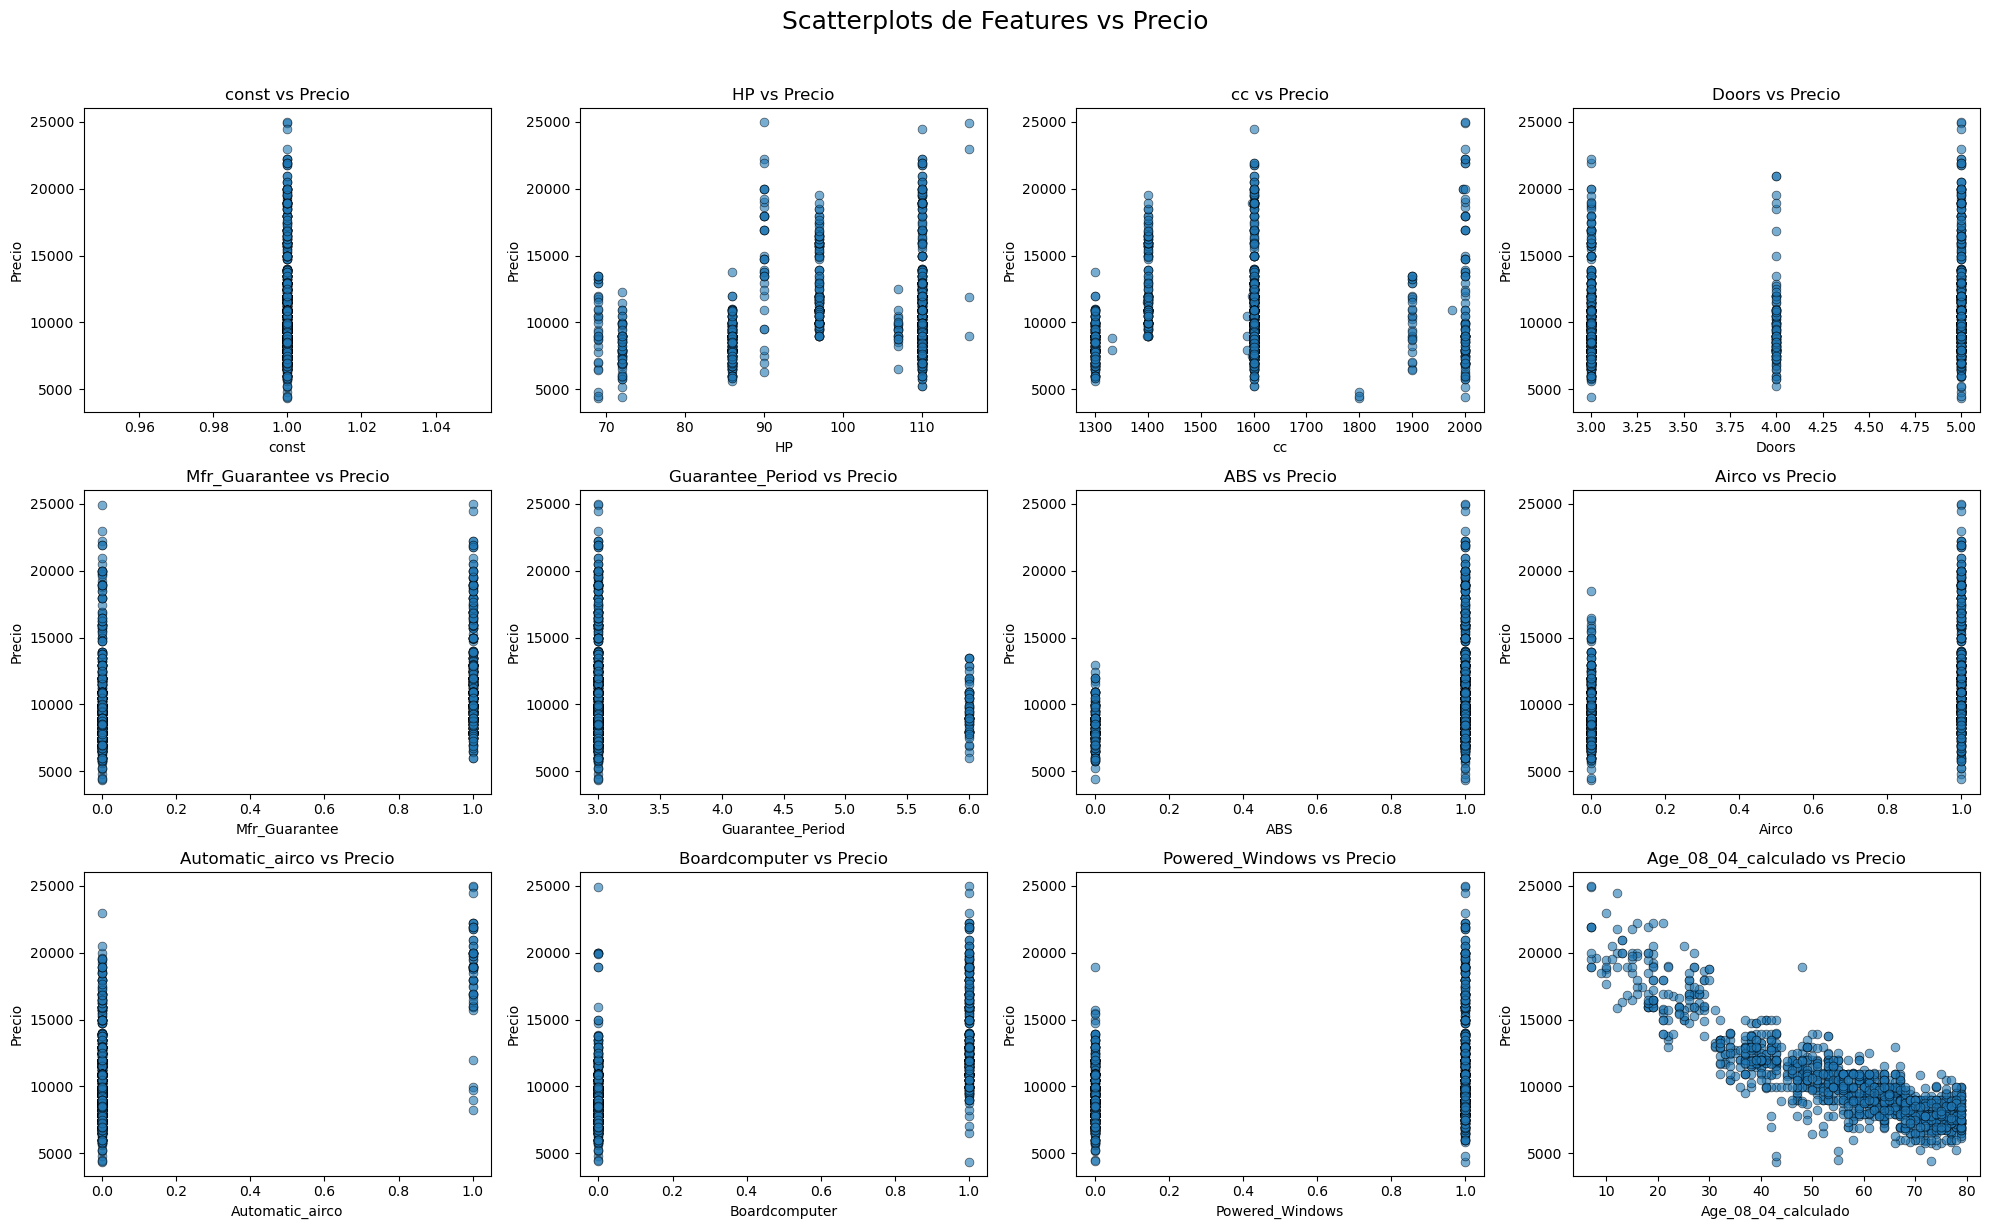

In [110]:
import math

# Calcular layout: 4 columnas, y tantas filas como necesites
n_cols = 4
n_features = len(X.columns)
n_rows = math.ceil(n_features / n_cols)

# Crear figura
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Iterar por cada columna y graficar
for i, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=X[column], y=y, alpha=0.6, edgecolor="k", s=40)
    plt.title(f'{column} vs Precio')
    plt.xlabel(column)
    plt.ylabel("Precio")
    plt.tight_layout()

# Espaciado entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Scatterplots de Features vs Precio', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Reducción de dimensionalidad por métodos de selección de variables

In [138]:
df_rd = df_limp.copy()

df_rd = df_rd.drop(columns=["Model", "Fuel_Type"])

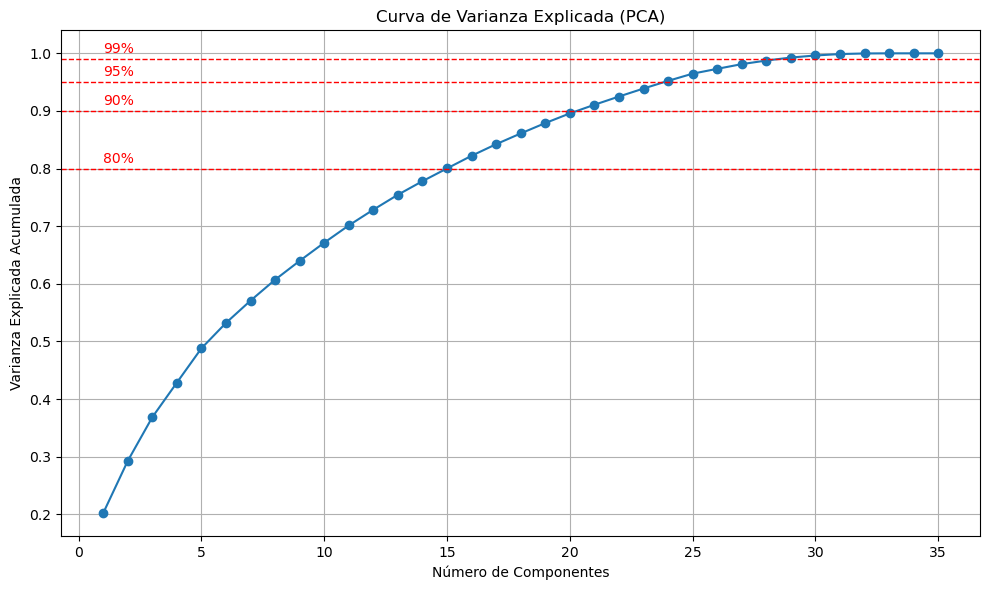

    Componente  Varianza Explicada  Acumulada
0            1        2.017567e-01   0.201757
1            2        9.067899e-02   0.292436
2            3        7.589671e-02   0.368332
3            4        6.002173e-02   0.428354
4            5        5.958295e-02   0.487937
5            6        4.410419e-02   0.532041
6            7        3.868665e-02   0.570728
7            8        3.632298e-02   0.607051
8            9        3.271856e-02   0.639769
9           10        3.150490e-02   0.671274
10          11        2.999977e-02   0.701274
11          12        2.730853e-02   0.728583
12          13        2.596532e-02   0.754548
13          14        2.353193e-02   0.778080
14          15        2.214999e-02   0.800230
15          16        2.195647e-02   0.822186
16          17        2.011290e-02   0.842299
17          18        1.862559e-02   0.860925
18          19        1.801892e-02   0.878944
19          20        1.676958e-02   0.895713
20          21        1.498278e-02

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Normalizar los datos (PCA es sensible a la escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_rd)

# 2. Aplicar PCA (sin especificar componentes aún)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Ver proporción de varianza explicada
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# 4. Graficar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', label='Varianza Acumulada')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Curva de Varianza Explicada (PCA)")
plt.grid(True)

# Líneas horizontales de referencia
for threshold in [0.80, 0.90, 0.95, 0.99]:
    plt.axhline(y=threshold, color='r', linestyle='--', linewidth=1)
    plt.text(1, threshold + 0.01, f"{int(threshold*100)}%", color='r')

plt.tight_layout()
plt.show()

varianza_por_componente = pd.DataFrame({
    "Componente": np.arange(1, len(explained_var_ratio)+1),
    "Varianza Explicada": explained_var_ratio,
    "Acumulada": cumulative_var_ratio
})

print(varianza_por_componente)


In [145]:
# 5. Cálculo de los loadings (coeficientes) para interpretar componentes
loadings = pd.DataFrame(pca.components_.T,  # Transponemos para que filas = variables, columnas = componentes
                        columns=[f'PC{i+1}' for i in range(len(explained_var_ratio))],
                        index=df_rd.columns)

# Mostrar los 10 variables más importantes para cada uno de los primeros 15 componentes
num_componentes = 15
top_n = 10

for i in range(num_componentes):
    print(f"\nTop {top_n} variables con mayor influencia en el Componente Principal {i+1}:")
    # Ordenar por valor absoluto descendente y obtener las top_n variables
    top_vars = loadings.iloc[:, i].abs().sort_values(ascending=False).head(top_n).index
    for var in top_vars:
        coef = loadings.loc[var, f'PC{i+1}']
        print(f"{var}: {coef:.4f}")




Top 10 variables con mayor influencia en el Componente Principal 1:
Mfg_Year: 0.3402
Age_08_04: -0.3395
Price: 0.3381
Id: -0.3144
Boardcomputer: 0.2783
CD_Player: 0.2213
Airco: 0.2211
Weight: 0.2095
Automatic_airco: 0.2035
ABS: 0.1913

Top 10 variables con mayor influencia en el Componente Principal 2:
Backseat_Divider: 0.4206
Guarantee_Period: -0.3641
Airbag_2: 0.3475
BOVAG_Guarantee: 0.3022
Radio_cassette: -0.2689
Radio: -0.2686
Sport_Model: 0.2294
Airbag_1: 0.2230
Power_Steering: 0.1934
ABS: 0.1728

Top 10 variables con mayor influencia en el Componente Principal 3:
Powered_Windows: 0.4165
Central_Lock: 0.4133
Mistlamps: 0.3865
Metallic_Rim: 0.3432
Airco: 0.2683
HP: 0.2364
Gears: 0.2310
Age_08_04: 0.1790
Id: 0.1790
Mfg_Year: -0.1781

Top 10 variables con mayor influencia en el Componente Principal 4:
Quarterly_Tax: 0.4571
Weight: 0.4064
KM: 0.3382
cc: 0.3356
Radio: -0.2637
Radio_cassette: -0.2618
Mfr_Guarantee: -0.2134
HP: -0.2093
ABS: -0.1537
BOVAG_Guarantee: -0.1412

Top 10 varia

In [117]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [118]:
alphas = np.logspace(-4, 1, 50)  # 50 valores entre 1e-4 y 10
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

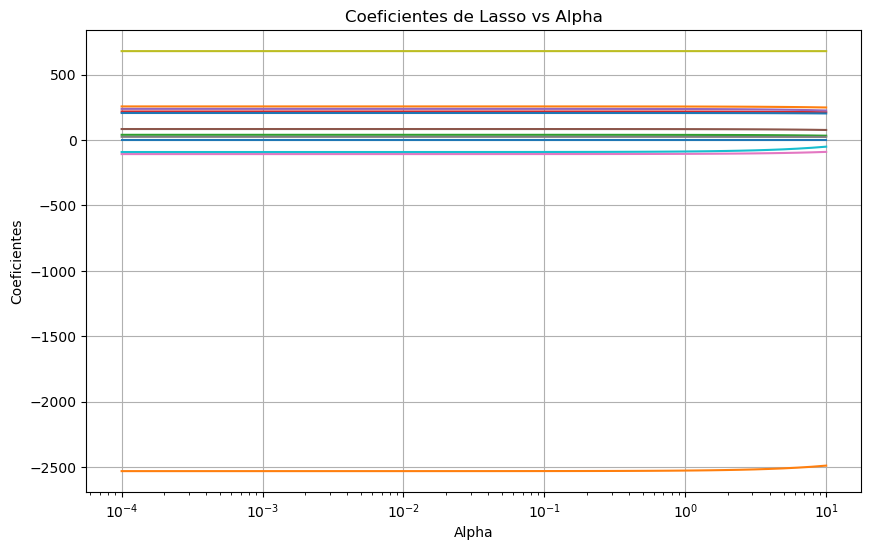

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
coefs = np.array(coefs)
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de Lasso vs Alpha")
plt.grid(True)
plt.show()

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcular_vif(X):
    """
    Calcula el VIF para cada feature del DataFrame X (incluyendo constante si está).
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [113]:
vif_resultados = calcular_vif(X_train)
print(vif_resultados.sort_values(by="VIF", ascending=False))

               Variable         VIF
0                 const  240.898885
11  Age_08_04_calculado    3.109242
9         Boardcomputer    2.336286
7                 Airco    1.716662
10      Powered_Windows    1.547273
6                   ABS    1.294597
8       Automatic_airco    1.281217
1                    HP    1.146433
4         Mfr_Guarantee    1.137575
5      Guarantee_Period    1.108391
2                    cc    1.088102
3                 Doors    1.061777


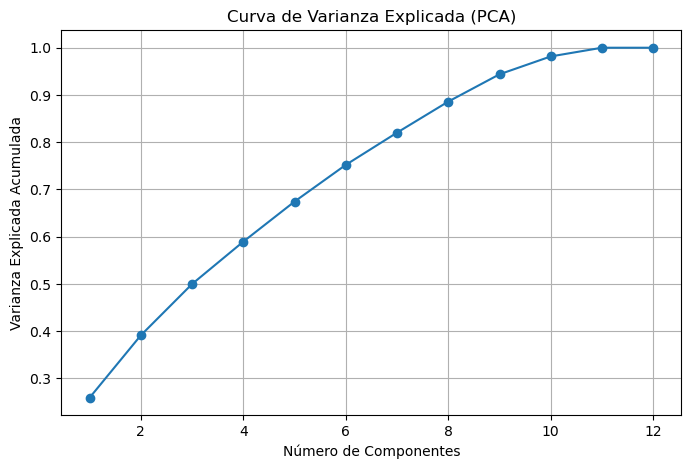

    Componente  Varianza Explicada  Acumulada
0            1            0.259022   0.259022
1            2            0.132079   0.391101
2            3            0.108623   0.499723
3            4            0.089724   0.589447
4            5            0.084843   0.674291
5            6            0.077708   0.751999
6            7            0.068223   0.820222
7            8            0.065725   0.885947
8            9            0.057804   0.943751
9           10            0.037826   0.981577
10          11            0.018423   1.000000
11          12            0.000000   1.000000


## Feature Selection

### Selección por correlación

In [ ]:
plt.figure(figsize=(16, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(
    df_pp.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},  # Tamaño de fuente de los números
    cbar_kws={"shrink": 0.8},  # Reduce el tamaño de la barra de color
    linewidths=0.5,  # Líneas entre celdas para más claridad
    square=True  # Hace que las celdas sean cuadradas
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matriz de correlación", fontsize=14)
plt.tight_layout()
plt.show()

### Utilizo Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=3.1611)  # probá valores mayores que LassoCV sugiere
lasso.fit(X_scaled, y)

selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X_scaled)
selected_features = X.columns[selector.get_support()]

print(f"Variables seleccionadas con alpha=0.1: {len(selected_features)}")

print(X.columns)
print(selected_features)

Variables seleccionadas con alpha=0.1: 26
Index(['const', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Powered_Windows',
       'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
       'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Age_08_04_calculado', 'Tiene_Airbag'],
      dtype='object')
Index(['KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Powered_Windows',
       'Power_Steering', 'Radio', 'Sport_Model', 'Backseat_Divider',
       'Metallic_Rim', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Age_08_04_calculado', 'Tiene_Airbag'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LassoCV

# LassoCV prueba distintos valores de alpha automáticamente
lasso_cv = LassoCV(cv=5, random_state=42)  # podés aumentar cv si querés más precisión
lasso_cv.fit(X_scaled, y)

# Mejor alpha encontrado
best_alpha = lasso_cv.alpha_
print(f"Mejor alpha encontrado: {best_alpha:.4f}")

Mejor alpha encontrado: 3.1611


c:\Users\Lucas\miniconda3\envs\toyota\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11367365.431161642, tolerance: 369220.120596777
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\miniconda3\envs\toyota\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12802679.50896287, tolerance: 369220.120596777
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\miniconda3\envs\toyota\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15559972.847820282, tolerance: 369220.120596777
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Lucas\miniconda3\envs\toyota\Lib\site-packages\

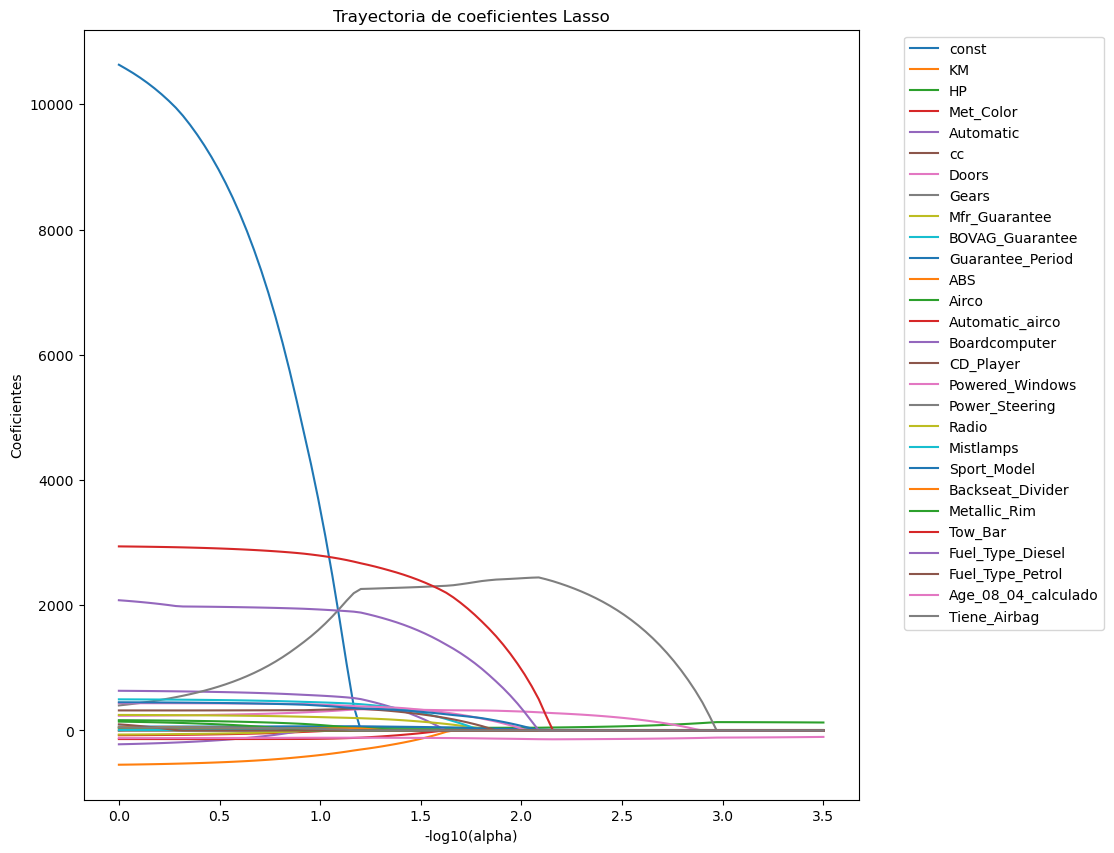

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# X, y son tus datos (features y target)
alphas = np.logspace(0, 3.5, 100)  # Valores de alpha a probar
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10).fit(X, y)

m_log_alphas = np.log10(lasso_cv.alphas_)

plt.figure(figsize=(10,10))
for i in range(X.shape[1]):
    plt.plot(m_log_alphas, lasso_cv.path(X, y, alphas=lasso_cv.alphas_)[1][i], label=features[i])

plt.xlabel('-log10(alpha)')
plt.ylabel('Coeficientes')
plt.title('Trayectoria de coeficientes Lasso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Filtro por dominio
df_limpio = df_pp[
    (df_pp["Price"] > 1000) & (df_pp["Price"] < 15000) &
    (df_pp["Age_08_04_calculado"] > 30) & (df_pp["Age_08_04_calculado"] < 80) &
    (df_pp["KM"] > 0) & (df_pp["KM"] < 140000) &
    (df_pp["cc"] > 600) & (df_pp["cc"] < 2500) &
    (df_pp["Weight"] > 800) & (df_pp["Weight"] < 1200) &
    (df_pp["Doors"].isin([3, 4, 5])) &
    (df_pp["Quarterly_Tax"] > 30) & (df_pp["Quarterly_Tax"] < 120)

]

In [ ]:
# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA de datos escalados")
plt.colorbar(label="Precio")
plt.show()
